In [4]:
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split



In [5]:
file_path=os.path.join(os.getcwd(),"dataset","train.csv")

df = pd.read_csv(file_path)

In [6]:
df.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


Duplicates

In [7]:
def remove_duplicates(df):
    """
    Remove duplicates from a DataFrame.

    Parameters:
    - df: pandas DataFrame

    Returns:
    - DataFrame with duplicates removed
    """
    # Print the shape before removing duplicates
    print("Shape before removing duplicates:", df.shape)

    # Remove duplicates
    df_no_duplicates = df.drop_duplicates()

    # Print the shape after removing duplicates
    print("Shape after removing duplicates:", df_no_duplicates.shape)

    return df_no_duplicates


df=remove_duplicates(df=df)

Shape before removing duplicates: (6500, 20)
Shape after removing duplicates: (6500, 20)


## Data Overview

In [8]:
df.describe

<bound method NDFrame.describe of                Customer Id          Artist Name  Artist Reputation  Height  \
0     fffe3900350033003300        Billy Jenkins               0.26    17.0   
1     fffe3800330031003900          Jean Bryant               0.28     3.0   
2     fffe3600370035003100         Laura Miller               0.07     8.0   
3         fffe350031003300       Robert Chaires               0.12     9.0   
4     fffe3900320038003400         Rosalyn Krol               0.15    17.0   
...                    ...                  ...                ...     ...   
6495  fffe3800370037003300  Jeffrey Freudenthal               0.37    37.0   
6496      fffe310036003400        Larry Edwards               0.67    15.0   
6497  fffe3600300031003300         Denise Worth               0.68    19.0   
6498  fffe3600350035003900          Daniel Drew               0.02    33.0   
6499  fffe3700310031003600       Vernon Carroll               0.18    30.0   

      Width     Weight   Mate

In [9]:
df.shape

(6500, 20)

Columns Lables

In [10]:
# Replace spaces with underscores in column labels
df.rename(columns=lambda x: x.replace(" ", "_"), inplace=True)

In [11]:
df.columns

Index(['Customer_Id', 'Artist_Name', 'Artist_Reputation', 'Height', 'Width',
       'Weight', 'Material', 'Price_Of_Sculpture', 'Base_Shipping_Price',
       'International', 'Express_Shipment', 'Installation_Included',
       'Transport', 'Fragile', 'Customer_Information', 'Remote_Location',
       'Scheduled_Date', 'Delivery_Date', 'Customer_Location', 'Cost'],
      dtype='object')

Check Na values

Columns with Percentage of Missing Values:
Artist_Reputation: 11.54%
Height: 5.77%
Width: 8.98%
Weight: 9.03%
Material: 11.75%
Transport: 21.42%
Remote_Location: 11.86%


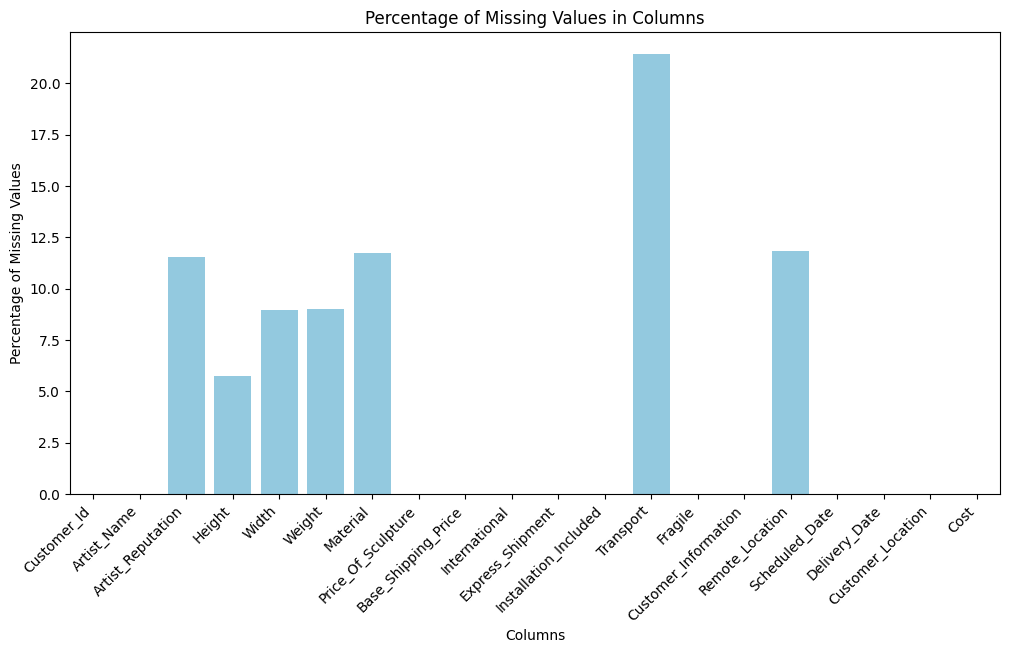

In [14]:
def plot_missing_values(df):
    """
    Plot missing values in the columns of a DataFrame and print columns with their percentage of missing values.

    Parameters:
    - df: pandas DataFrame

    Returns:
    - None (displays the plot)
    """
    # Calculate the percentage of missing values in each column
    missing_percentage = (df.isnull().sum() / len(df)) * 100

    # Print columns with their percentage of missing values
    print("Columns with Percentage of Missing Values:")
    for col, percentage in missing_percentage.items():
        if percentage != 0 :
            print(f"{col}: {percentage:.2f}%")

    # Create a bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x=missing_percentage.index, y=missing_percentage.values, color='skyblue')
    plt.title('Percentage of Missing Values in Columns')
    plt.xlabel('Columns')
    plt.ylabel('Percentage of Missing Values')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

    
    
plot_missing_values(df=df)

#### Train Test Split

In [17]:
# Exclude the 'Target' column from the features (X)
X = df.drop('Cost', axis=1)
y=df["Cost"]


# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
X_train.head()

,Customer_Id,Artist_Name,Artist_Reputation,Height,Width,Weight,Material,Price_Of_Sculpture,Base_Shipping_Price,International,Express_Shipment,Installation_Included,Transport,Fragile,Customer_Information,Remote_Location,Scheduled_Date,Delivery_Date,Customer_Location
889,fffe3700370036003700,Robert Fehrenbach,0.00,4.0,4.0,51.0,Clay,4.70,19.42,No,No,Yes,Airways,Yes,Working Class,No,06/01/17,06/03/17,"Port Matthewberg, AL 60234"
4385,fffe3700330039003400,Matthew Minick,0.62,31.0,7.0,2729.0,Clay,9.20,19.05,No,No,No,Roadways,Yes,Working Class,No,04/27/16,04/27/16,"Nicolefort, NC 23101"
4919,fffe3700390037003300,Juan Saylor,0.37,18.0,9.0,233674.0,Stone,1011.11,90.95,No,Yes,No,Roadways,No,Wealthy,No,10/12/15,10/08/15,"Lake Toddstad, AR 03269"
4794,fffe3200300036003300,Michael Howe,0.49,7.0,NaN,5046.0,Stone,10.31,70.65,No,Yes,Yes,NaN,No,Wealthy,NaN,01/24/19,01/27/19,"New Jon, ID 20621"
5438,fffe3400310031003500,Emily Bank,0.40,26.0,10.0,15590.0,Brass,22.03,57.78,No,No,No,Airways,No,Working Class,No,07/16/18,07/16/18,"Bryantbury, WY 06158"


# Stastiscial analysis 

Splitting Numerical and catgeorical columns

In [25]:
X_train.shape

(5200, 19)

In [20]:
def split_numerical_categorical_labels(df):
    """
    Identify and return labels of numerical and categorical columns in a DataFrame.

    Parameters:
    - df: pandas DataFrame

    Returns:
    - numerical_labels: List of labels for numerical columns
    - categorical_labels: List of labels for categorical columns
    """
    # Identify numerical columns
    numerical_labels = list(df.select_dtypes(include=['number']).columns)

    # Identify categorical columns
    categorical_labels = list(df.select_dtypes(include=['object', 'category']).columns)

    return numerical_labels, categorical_labels


numerical_labels, categorical_labels = split_numerical_categorical_labels(df=X_train)

In [21]:
numerical_labels

['Artist_Reputation',
 'Height',
 'Width',
 'Weight',
 'Price_Of_Sculpture',
 'Base_Shipping_Price']

In [24]:
X_train[numerical_labels]

,Artist_Reputation,Height,Width,Weight,Price_Of_Sculpture,Base_Shipping_Price
889,0.00,4.0,4.0,51.0,4.70,19.42
4385,0.62,31.0,7.0,2729.0,9.20,19.05
4919,0.37,18.0,9.0,233674.0,1011.11,90.95
4794,0.49,7.0,NaN,5046.0,10.31,70.65
5438,0.40,26.0,10.0,15590.0,22.03,57.78
...,...,...,...,...,...,...
3772,0.16,9.0,5.0,84.0,5.36,22.25
5191,0.06,5.0,4.0,22.0,6.63,17.88
5226,0.12,22.0,10.0,23991.0,16.36,68.25
5390,0.19,NaN,7.0,126928.0,87.62,26.96


In [22]:
categorical_labels

['Customer_Id',
 'Artist_Name',
 'Material',
 'International',
 'Express_Shipment',
 'Installation_Included',
 'Transport',
 'Fragile',
 'Customer_Information',
 'Remote_Location',
 'Scheduled_Date',
 'Delivery_Date',
 'Customer_Location']

In [26]:
X_train[categorical_labels]

,Customer_Id,Artist_Name,Material,International,Express_Shipment,Installation_Included,Transport,Fragile,Customer_Information,Remote_Location,Scheduled_Date,Delivery_Date,Customer_Location
889,fffe3700370036003700,Robert Fehrenbach,Clay,No,No,Yes,Airways,Yes,Working Class,No,06/01/17,06/03/17,"Port Matthewberg, AL 60234"
4385,fffe3700330039003400,Matthew Minick,Clay,No,No,No,Roadways,Yes,Working Class,No,04/27/16,04/27/16,"Nicolefort, NC 23101"
4919,fffe3700390037003300,Juan Saylor,Stone,No,Yes,No,Roadways,No,Wealthy,No,10/12/15,10/08/15,"Lake Toddstad, AR 03269"
4794,fffe3200300036003300,Michael Howe,Stone,No,Yes,Yes,NaN,No,Wealthy,NaN,01/24/19,01/27/19,"New Jon, ID 20621"
5438,fffe3400310031003500,Emily Bank,Brass,No,No,No,Airways,No,Working Class,No,07/16/18,07/16/18,"Bryantbury, WY 06158"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,fffe3100390031003500,Carolyn Foster,NaN,No,No,No,Airways,No,Working Class,Yes,01/15/15,01/13/15,"New David, VA 79126"
5191,fffe3700340036003700,Glenn Ruffin,Wood,No,No,Yes,Roadways,No,Working Class,No,09/06/18,09/02/18,"Port Kyleland, MA 98248"
5226,fffe3200300032003900,Janet Lima,Brass,No,No,No,Roadways,No,Working Class,No,11/20/16,11/17/16,"Brownville, ID 12970"
5390,fffe3400320038003100,Linda Pugh,Stone,No,No,No,Waterways,No,Working Class,No,02/15/17,02/13/17,"Lake Matthew, AR 77876"


### Numerical

#### Discrete 

In [28]:
def separate_discrete_continuous_data(df):
    """
    Separate a DataFrame into two DataFrames: one with discrete variables and one with continuous variables.

    Parameters:
    - df: pandas DataFrame

    Returns:
    - discrete_data: DataFrame with discrete variable columns
    - continuous_data: DataFrame with continuous variable columns
    """
    # Separate columns based on data types
    discrete_data = df.select_dtypes(include=['object', 'category'])
    continuous_data = df.select_dtypes(include=['number'])

    return discrete_data, continuous_data


discrete_data, continuous_data=separate_discrete_continuous_data(df=X_train[numerical_labels])

#### Continuous 

In [30]:
continuous_data

,Artist_Reputation,Height,Width,Weight,Price_Of_Sculpture,Base_Shipping_Price
889,0.00,4.0,4.0,51.0,4.70,19.42
4385,0.62,31.0,7.0,2729.0,9.20,19.05
4919,0.37,18.0,9.0,233674.0,1011.11,90.95
4794,0.49,7.0,NaN,5046.0,10.31,70.65
5438,0.40,26.0,10.0,15590.0,22.03,57.78
...,...,...,...,...,...,...
3772,0.16,9.0,5.0,84.0,5.36,22.25
5191,0.06,5.0,4.0,22.0,6.63,17.88
5226,0.12,22.0,10.0,23991.0,16.36,68.25
5390,0.19,NaN,7.0,126928.0,87.62,26.96


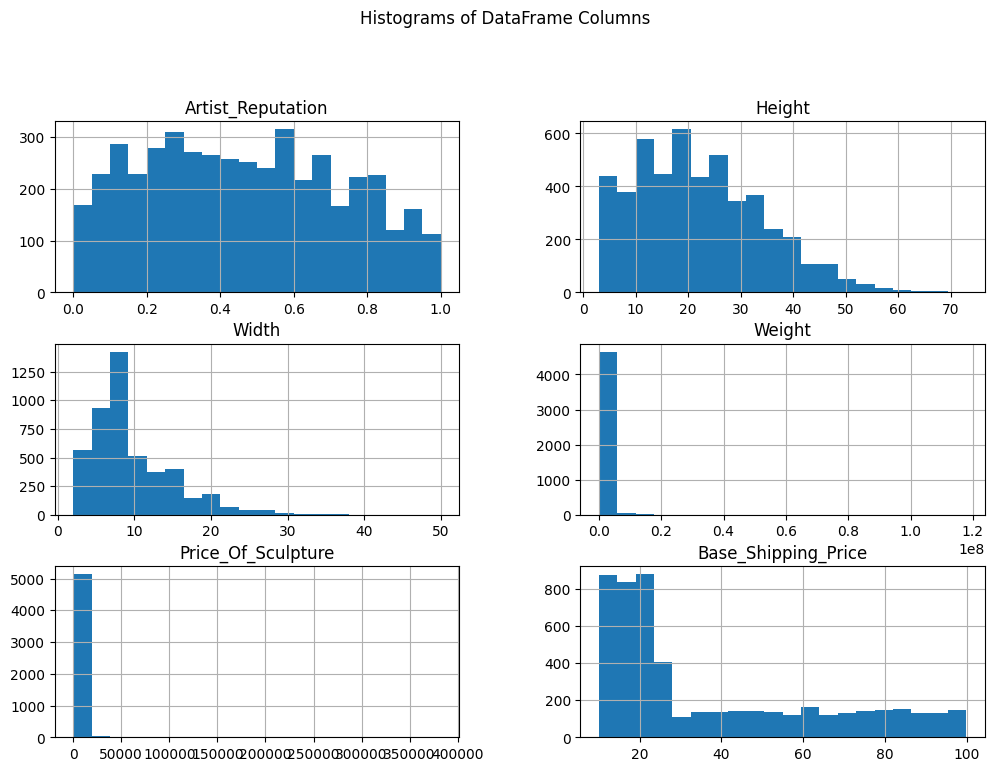

In [32]:
def plot_histograms(df):
    """
    Plot histograms for each column in a DataFrame.

    Parameters:
    - df: pandas DataFrame
    """
    # Use the hist method to plot histograms for all columns
    df.hist(figsize=(12, 8), bins=20)
    
    # Set plot labels and title
    plt.suptitle("Histograms of DataFrame Columns", y=1.02)
    plt.show()
    
    
plot_histograms(df=continuous_data)

### Categorical